In [ ]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
X["B"] = (X["A"]) *6

In [ ]:
plt.plot(X.A, X.B, "o")

In [ ]:
def relu(x):
    return(x * (x > 0))

Yes. Keras initializes some negative and some positive weights, randomly by default -- you can also specify how the weights are initialized [link] (https://keras.io/initializers/). I think that you're right that some nodes could be dead at the start, if the incoming weights sum up to a value less than 0

In [ ]:
################# CUSTOM LOSS FUNCTION ########################

In [ ]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from keras.backend import clear_session
clear_session()

from keras import losses

def my_loss(y_true, y_pred):
    final_loss = (losses.binary_crossentropy(y_true[:, 0], y_pred[:, 0]) + 
                    y_true[:, 0] * 
                  losses.categorical_crossentropy(y_true[:, 1:], y_pred[:,1:]))
    return final_loss

In [ ]:
from keras.layers import Concatenate
XX = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
XX["B"] = (XX["A"]) *6 + XX["B"]
yy = np.random.randn(1000, 2)

n = 2

input_layer = Input(shape=(n, ))
shared = Dense(32)(input_layer)
sub1 = Dense(16)(shared)
sub2 = Dense(16)(shared)
y1 = Dense(1, activation='sigmoid')(sub1)
y2 = Dense(4, activation='softmax')(sub2)
mergedOutput = Concatenate()([y1, y2])


In [ ]:
model = Model(input_layer, mergedOutput)
model.summary()

model.compile(optimizer='adam', loss=my_loss)
yy.shape

In [ ]:
Trainmod = model.fit(x=XX, y=yy, epochs=10, batch_size=2**6)
# plt.plot(XX.A, X.B, "o", label = "actual")
# plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

#plt.legend()

In [ ]:
model.predict(np.array([[13, .12]]))

In [ ]:
np.array(XX)

In [ ]:



def disemvowel(string):
    message = []
    vowels = ['a', 'e', 'i', 'o', 'u']
    for letter in string:
         if letter not in vowels:
                message.append(letter)
    return (message)

disemvowel("Leol")

In [ ]:
aeInput = Input((2,))
encode = Dense(2, activation='relu')(aeInput)
aeOutput = Dense(2, activation='relu')(encode)

In [ ]:
import keras.backend as K

# examples of custom loss functions
def my_loss(y_true, y_pred):
    # this example is mean squared error
    # works if if y_pred and y_true are greater than 1D
    return K.mean(K.square(y_pred - y_true))

def my_loss(y_true, y_pred):
    # calculate mean(abs(y_pred1*y_pred2 - y_true1*ytrue2)) 
    return K.mean(K.abs(K.prod(y_pred, axis = 1) - K.prod(y_true, axis = 1)))

AE = Model(aeInput, aeOutput, name="autoencoder")
AE.compile(optimizer='adam', loss=my_loss, )

In [ ]:
import tensorflow as tf

y_true = np.random.rand(100, 2) + 1
y_pred = np.random.rand(100, 2) + 1

my_loss(y_true, y_pred) # tensor
print(tf.Session().run(K.mean(my_loss(y_true, y_pred))))

In [ ]:
wts = [np.array([[4,  5 ],
        [2, 6]], dtype="float32"),
 np.array([ 0, 0], dtype="float32"),
 np.array([[1, 1],
        [1, 1 ]], dtype="float32"),
 np.array([0, 0  ], dtype="float32")]

AE.set_weights(wts)

In [ ]:

AE.get_weights()

In [ ]:
TrainAE = AE.fit( x=X, y=X, epochs=10, batch_size=2**6)
plt.plot(X.A, X.B, "o", label = "actual")
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

plt.legend()

In [ ]:
AE.evaluate(X, X)

In [ ]:
import tensorflow as tf

y_true = X.astype("float32")
y_pred = AE.predict(X).astype("float32")

print(tf.Session().run((my_loss(y_true, y_pred))))

In [ ]:
y_true = X
y_pred = AE.predict(X)

my_loss(y_true, y_pred) # tensor
print(tf.Session().run(K.mean(my_loss(y_true, y_pred))))

In [ ]:
AE.predict(X).shape

In [ ]:
wts = AE.get_weights()
wts = [np.array([[-0,  -0 ],
        [ -0, -0]], dtype="float32"),
 np.array([ 0, 0], dtype="float32"),
 np.array([[ 0,  0 ],
        [ 0 , 0 ]], dtype="float32"),
 np.array([0, 0  ], dtype="float32")]

AE.set_weights(wts)

In [ ]:
wtsConcatenated = [np.vstack([wts[ii + 1], wts[ii]]) for ii in np.arange(0, len(wts), 2)]

In [ ]:
AE.predict(np.array([[-0.9, -0.33]]))

In [ ]:
AE.predict(X).shape

In [ ]:
LayerValues = []
    
inputData= np.array([[1, -0.9, -0.33]])
LayerValues.append(inputData)

jj = 0

wtsConcatenated = [np.vstack([wts[ii + 1], wts[ii]]) for ii in np.arange(0, len(wts), 2)]

nextLayer = np.dot(LayerValues[jj], wtsConcatenated[jj]).astype("float32")
nextLayer = np.hstack([np.array([1], dtype = "float32").reshape(-1,1), nextLayer] )
nextLayer = relu(nextLayer) # apply relu
print(nextLayer)
jj = 1
nextLayer = np.dot(np.array([nextLayer]), wtsConcatenated[jj]).astype("float32")
relu(nextLayer)

In [ ]:
plt.plot(X.A, X.B, "o", label = "actual")
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

plt.legend()

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.kdeplot( X.A, X.B, shade=False, axis=ax)
sns.kdeplot(AE.predict(X)[:,0], AE.predict(X)[:,1], shade=False, axis=ax)

In [ ]:
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o")

In [ ]:
from PIL import Image
import numpy as np
from pylab import imshow, show, get_cmap
from numpy import random

Z = random.random((50,50))   # Test data

imshow(Z, cmap=get_cmap("Spectral"), interpolation='nearest')
plt.savefig('your_file.tif')

In [ ]:
import cv2

BLACK_MIN = np.array([0, 20, 20], np.uint8)
BLACK_MAX = np.array([120, 255, 255], np.uint8)
imgg = cv2.imread('your_file.tif', 1)
dst = cv2.inRange(imgg, BLACK_MIN, BLACK_MAX)

no_black = cv2.countNonZero(dst)

print('The number of black pixels is: ' + str(no_black))

In [ ]:
imgg

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imgg)

In [ ]:
#### More custom losses

In [ ]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
%matplotlib inline

In [ ]:
class Losses:
    def IoULoss(targets, inputs, smooth=1e-6):
        #targets = K.flatten(targets)
#         inputs = K.reshape(inputs, [1, -1]) # 1 row, as many columns as needed
#         targets = K.reshape(targets, [-1, 1]) # 1 column, as many rows as needed
        inputs = K.reshape(inputs, [1, -1]) # 1 row, as many columns as needed
        targets = K.reshape(targets, [-1, 1]) # 1 column, as many rows as needed
        print(inputs.shape, targets.shape)
        print(K.sum(K.dot(targets, inputs)).shape)
        
        intersection = K.sum(K.dot(targets, inputs))
        total = K.sum(targets) + K.sum(inputs)
        union = total - intersection

        IoU = (intersection + smooth) / (union + smooth)
        return 1 - IoU

aeInput = Input((2,))
encode = Dense(2, activation='relu')(aeInput)
aeOutput = Dense(2, activation='relu')(encode)
model = Model(aeInput, aeOutput)

model.compile(loss=Losses.IoULoss, optimizer="adam",
                      metrics=["accuracy"])

In [ ]:
XX = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
XX["B"] = (XX["A"]) *6 + XX["B"]
yy = np.random.randn(1000, 2)

model.fit(XX, yy)

In [ ]:
import tensorflow as tf
import numpy as np

xx = np.random.randn(100)
xx = np.asarray(xx, np.float32)

xx_tf = tf.convert_to_tensor(xx, np.float32)
xx_tf = K.reshape(xx_tf, [-1, 1])
print(xx_tf.shape)

yy = np.random.randn(100)
yy = np.asarray(yy, np.float32)

yy_tf = tf.convert_to_tensor(xx, np.float32)
yy_tf = K.reshape(yy_tf, [1, -1])
K.dot(xx_tf, yy_tf)

In [ ]:
xx_tf = K.reshape(xx_tf, [1, -1])
yy_tf = K.reshape(yy_tf, [-1, 1])


print(tf.Session().run(Losses.IoULoss(xx_tf, yy_tf)))

In [ ]:
np.dot(np.random.rand(100), np.random.rand(100))

In [ ]:
x = K.random_uniform_variable(shape=(100, 1), low=0, high=1)
y = K.random_uniform_variable(shape=(1, 100), low=0, high=1)
xy = K.dot(x, y)

In [ ]:
x2 = K.flatten(y)
x2.shape

In [ ]:
x.shape

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 123)

# fit supervised KNN classifier
knn = KNeighborsClassifier()
knn.fit(X, y) 

# create 50 new data points
# with the same number of features as the training set
new_data = np.random.randn(50, 2)

# predict new labels
new_labels = knn.predict(new_data)

# plot training clusters
plt.plot(X[y== 1, 0], 
         X[y==1,1], 
         "C1o", label = "training cluster 1")
plt.plot(X[y== 0, 0], 
         X[y==0,1], 
         "C0o", label = "training custer 2")

# plot predictions on new data
plt.plot(new_data[new_labels== 1, 0], 
         new_data[new_labels==1,1], 
         "ro", label = "new data assigned to cluster 1")
plt.plot(new_data[new_labels== 0, 0], 
         new_data[new_labels==0,1], 
         "bo", label = "new data assigned to cluster 2")
plt.legend()

In [ ]:
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 



knn.predict(iris_X_test)

iris_y_test

In [ ]:
import random 
import time

players = input("Let's play Five's! How many are you?:" )
#print("you are", players, "players?") #test number of players
players = int(players)

In [2]:
if players <=1:
    print("Game Over")

else:
    while players >= 1:
        #players = players+1

#Decide possible values than can be chosen
        options = [] #Possible options
        for i in range(0,players):
            x = i * 5
            options.append(x)
        print("Your choices are", options)

#Playing the game
#Each turn
        guess = random.choice(options)
        print("Computer has chosen", int(guess))
        count_down = 3
        while (count_down):
            print(count_down)
            time.sleep(1)
            count_down -=  1
        choice = input("Guess:")
        choice = int(choice)
        if choice not in options: #If choice isn't a multiple of 5
            input("Not allowed, choose again:")
        elif choice in options and choice != guess: #Valid choice but wrong
                print("Wrong")                      #so player is still in the
        else:                                       #game
            choice = int(choice)
            if choice == guess: #Correct choice so player leaves game
                print("You're Out.") # this should reduce the player count
        players -=1

Your choices are [0, 5, 10, 15, 20]
Computer has chosen 10
3
2
1


Guess: 10


You're Out.
Your choices are [0, 5, 10, 15]
Computer has chosen 15
3
2
1


Guess: 5


Wrong
Your choices are [0, 5, 10]
Computer has chosen 5
3
2
1


Guess: 0


Wrong
Your choices are [0, 5]
Computer has chosen 5
3
2
1


Guess: 1
Not allowed, choose again: 5


Your choices are [0]
Computer has chosen 0
3
2
1


Guess: 0


You're Out.


In [256]:
import numpy as np

def next_batch(X,y,batchsize):
    for i in np.arange(0,X.shape[0],batchsize):
        yield(X[i:i+batchsize],y[i:i+batchsize])

def des(X,y,learning_rate,epoches, batchsize):
    X=np.c_[np.ones((X.shape[0])),X]
    W=np.random.uniform(size=(X.shape[1],))
    lossHistory=[]
    for epoch in np.arange(0,epoches):
        epochLoss=[]
        for (batchX,batchY) in next_batch(X,y,batchsize):
            #batchY = batchY.reshape(-1)
            preds=batchX.dot(W)
            print(preds.shape, batchY.shape)
            error=preds-batchY
            loss=np.sum(error**2)
            epochLoss.append(loss)
            gradient=batchX.T.dot(error)/batchX.shape[0]
            W+=-learning_rate*gradient
    lossHistory.append(np.average(epochLoss))
    return W,lossHistory

In [259]:
from sklearn.model_selection import train_test_split
data = np.random.randn(150,13)
target = np.random.randn(150)

train_data_intercept = np.insert(data, 0, 1, axis=1) 
train_data,test_data,train_target,test_target = train_test_split(train_data_intercept,(target[:, np.newaxis]), test_size=0.2, random_state=42)
#train_data,test_data,train_target,test_target = train_test_split(data,target, test_size=0.2, random_state=42)
train_data.shape, train_target.shape


((120, 14), (120, 1))

In [260]:
w, loss = des(train_data,train_target,0.01,10,32)
w, loss

(32,) (32, 1)


ValueError: operands could not be broadcast together with shapes (15,) (15,32) (15,) 

In [226]:
import pandas as pd
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,-1.324155,0.280023,0.906174,-0.546467,0.450499,1.544092,-1.187309,-1.809241,0.921990,-0.048623,1.400153,0.295839,-0.649771,0.018622
1,1.0,0.296955,-0.014474,-0.373151,-0.983438,1.030189,0.302328,-1.094334,0.981874,0.326451,0.370504,-0.752608,1.196286,0.608868,0.964627
2,1.0,0.765843,-0.230580,-0.567077,0.141241,-0.407424,1.817883,0.058964,-1.989771,1.158538,-0.676569,-0.647796,-1.570263,-0.385619,-2.602803
3,1.0,1.415270,-0.233568,-0.485154,0.100138,0.777029,0.415959,-0.671644,-0.936163,0.598917,-0.674595,0.593295,2.321953,-0.565495,0.145577
4,1.0,0.056278,-0.538365,-2.035299,-0.786087,-0.196908,-0.520349,1.173315,0.244964,0.302927,0.170116,0.121828,-0.434741,-0.864817,-0.144488
5,1.0,0.943468,-0.262951,-0.741601,0.582080,-0.472952,-0.234918,0.185775,0.460341,-0.298004,-0.089468,-0.796131,-1.114263,0.050091,-0.312687
6,1.0,0.939779,-0.987735,-0.251745,0.133066,1.094890,-0.297343,-2.700651,0.585107,0.982556,0.520110,0.314605,0.003622,-1.499442,-0.845574
7,1.0,-1.129639,-2.024403,0.810383,0.127532,-0.297367,-0.652425,0.504963,1.832211,0.762544,-1.250540,-0.098536,0.431886,0.465799,-2.451167
8,1.0,-0.215829,-1.654899,-0.837927,2.861428,0.384361,-0.891486,0.568802,-0.438358,1.031554,0.168371,0.361630,1.105988,0.555555,0.480013
9,1.0,2.136869,-1.083203,1.357632,-0.348590,0.383872,-0.341981,1.071189,-0.712925,-0.286234,0.613680,0.206219,0.074014,-1.082022,0.449712


In [5]:
from keras import Model
from keras.layers import Input, Dense, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
%matplotlib inline

# Model.add(LSTM(32, input_shape=(5,2), return_sequences=True, activation='tanh'))


In [93]:
trainx = np.random.randn(5, 5000)
trainx.shape[:-1]

input_layer = Input(shape = (5, 1))
l1 = LSTM(32, activation='tanh')(input_layer)
y1 = Dense(1, activation='softmax')(l1)

model = Model(input_layer, y1)
trainx.shape

(5, 5000)

In [94]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_55 (InputLayer)        (None, 5, 1)              0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [95]:
Trainmod = model.fit(x=trainx, y=trainx, epochs=2, batch_size=2**6)

ValueError: Error when checking input: expected input_55 to have 3 dimensions, but got array with shape (5, 5000)

In [97]:
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        (None, 100, 1)            0         
_________________________________________________________________
lstm_57 (LSTM)               (None, 10)                480       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


In [98]:
model.compile(optimizer='adam', loss="mean_squared_error")

In [135]:

# refref here
trainx = np.random.randn(5, 23, 1)
trainy = np.random.randn(5, 1, )

visible = Input(shape=(23,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
model.compile(optimizer='adam', loss="mean_squared_error")

model.fit(x=trainx, y=trainy, epochs=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        (None, 23, 1)             0         
_________________________________________________________________
lstm_60 (LSTM)               (None, 10)                480       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
5/5 [==============================] - 1s 213ms/step - loss: 0.9757
Epoch 2/2
5/5 [==============================] - 0s 7ms/step - loss: 0.9738


Text(0, 0.5, 'Snowfall Accumulation (in.)')

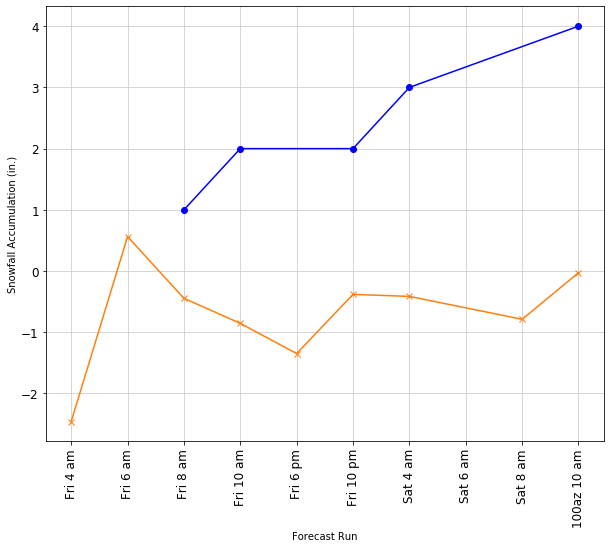

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame({"GFS": [np.nan, np.nan, 1, 2, np.nan, 
                          2, 3, np.nan, np.nan, 4], 
                    "RAP": [-2.45832646,  0.56266567, -0.4453474 , 
                            -0.85447845, -1.34830127,
                            -0.38113925, -0.41400397,  
                            np.nan, -0.78764545, -0.02807674]})

fh = np.array(["Fri 4 am", "Fri 6 am","Fri 8 am","Fri 10 am",
                "Fri 6 pm","Fri 10 pm","Sat 4 am","Sat 6 am",
                "Sat 8 am","100az 10 am"
                ])

gfs = df['GFS']
rap = df['RAP']


fig2, ax2 = plt.subplots(figsize=(10,8))

# workaround to set the order of xlabels
ax2.plot(fh, [np.nan]*len(fh)) 

# remove nan's  so that the points are connected
ax2.plot(fh[~np.isnan(gfs)], gfs[~np.isnan(gfs)], "ob-") 
ax2.plot(fh[~np.isnan(rap)],rap[~np.isnan(rap)],marker='x')

ax2.tick_params(which='major',labelsize='12')
ax2.grid(which='major', color='#CCCCCC', linestyle='-')
plt.xticks(rotation='90')
plt.xlabel('Forecast Run')
plt.ylabel('Snowfall Accumulation (in.)')

[None, None, None, None, None, None, None, None, None, None]

In [25]:
~np.isnan(gfs)

0    False
1    False
2     True
3     True
4    False
5     True
6     True
7    False
8    False
9     True
Name: GFS, dtype: bool

In [59]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import optimizers

import numpy as np
import copy



# data
data = np.random.randn(20000, 2001) + 100# read my input samples. They are 1d functions of time and I have 2000 of them.
# Each function has 2001 time components

# shuffling data before training
import random
random.seed(5)
random.shuffle(data)

# split training (1500 samples) and testing (500 samples) dataset
X_train = data[:1500]
X_test = data[1500:]

# normalize training and testing set using mean and std deviation of training set
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std

X_test -= X_mean
X_test /= X_std


### MODEL ###

# Architecture

# input layer
input_shape = [X_train.shape[1]]
X_input = Input(input_shape)

# hidden layers

x = Dense(1000, activation='tanh', name='enc0')(X_input)
encoded = Dense(500, activation='tanh', name='enc1')(x)
encoded_2 = Dense(200, activation='tanh', name='enc2')(encoded)
encoded_3 = Dense(50, activation='tanh', name='enc3')(encoded_2)
decoded_2 = Dense(200, activation='tanh', name='dec2')(encoded_3)
decoded_1 = Dense(500, activation='tanh', name='dec1')(decoded_2)
x2 = Dense(1000, activation='tanh', name='dec0')(decoded_1)

# output layer
decoded = Dense(input_shape[0], name='out')(x2)

# the Model
model = Model(inputs=X_input, outputs=decoded, name='autoencoder')

# optimizer
opt = optimizers.Adamax()
model.compile(optimizer=opt, loss='mse', metrics=['acc'])
print(model.summary())

###################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 2001)              0         
_________________________________________________________________
enc0 (Dense)                 (None, 1000)              2002000   
_________________________________________________________________
enc1 (Dense)                 (None, 500)               500500    
_________________________________________________________________
enc2 (Dense)                 (None, 200)               100200    
_________________________________________________________________
enc3 (Dense)                 (None, 50)                10050     
_________________________________________________________________
dec2 (Dense)                 (None, 200)               10200     
_________________________________________________________________
dec1 (Dense)                 (None, 500)               100500    
__________

In [60]:
### TRAINING ###

epochs = 200
# train the model
history = model.fit(x = X_train, y = X_train,
                    epochs=epochs,
                    batch_size=2000,
                    validation_split=0.2)  # using 20% of training samples for validation

Train on 1200 samples, validate on 300 samples
Epoch 1/200
1200/1200 [==============================] - 1s 729us/step - loss: 1.0182 - acc: 0.0000e+00 - val_loss: 1.0009 - val_acc: 0.0000e+00
Epoch 2/200
1200/1200 [==============================] - 0s 48us/step - loss: 0.9901 - acc: 0.0058 - val_loss: 0.9921 - val_acc: 0.0000e+00
Epoch 3/200
1200/1200 [==============================] - 0s 48us/step - loss: 0.9703 - acc: 0.0000e+00 - val_loss: 0.9858 - val_acc: 0.0000e+00
Epoch 4/200
1200/1200 [==============================] - 0s 46us/step - loss: 0.9516 - acc: 0.0017 - val_loss: 0.9810 - val_acc: 0.0000e+00
Epoch 5/200
1200/1200 [==============================] - 0s 47us/step - loss: 0.9331 - acc: 0.0042 - val_loss: 0.9781 - val_acc: 0.0033
Epoch 6/200
1200/1200 [==============================] - 0s 47us/step - loss: 0.9151 - acc: 0.0108 - val_loss: 0.9771 - val_acc: 0.0033
Epoch 7/200
1200/1200 [==============================] - 0s 47us/step - loss: 0.8981 - acc: 0.0158 - val_loss: 0

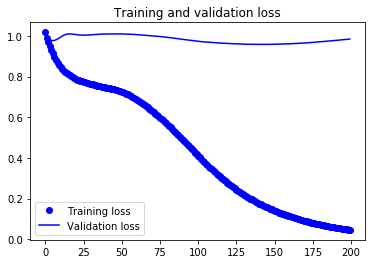

In [61]:
# Testing 
prediction = model.predict(X_test)
for i in range(len(prediction)):
    prediction[i] = np.multiply(prediction[i], X_std) + X_mean

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ = np.arange(epochs)
plt.figure()
plt.plot(epochs_, loss, 'bo', label='Training loss')
plt.plot(epochs_, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()

In [43]:
from keras import losses

In [46]:
import tensorflow as tf
from keras import losses
prediction = model.predict(X_test)
print(np.mean(tf.Session().run(losses.mean_squared_error(X_test, prediction))))


1.062056916092937


In [47]:
((prediction - X_test)**2).mean(axis=None)

1.0620569160929365

In [45]:
import tensorflow as tf
prediction = model.predict(X_test)
for i in range(len(prediction)):
    prediction[i] = np.multiply(prediction[i], X_std) + X_mean
print(np.mean(tf.Session().run(losses.mean_squared_error(X_test, prediction))))


10000.629506378205


In [38]:
prediction = model.predict(X_train)
print(np.mean(tf.Session().run(losses.mean_squared_error(X_train, prediction))))

0.168099032710294


In [70]:
xx = np.arange(0, 6000)
yy = np.linspace(-0.2,1, num = len(xx))

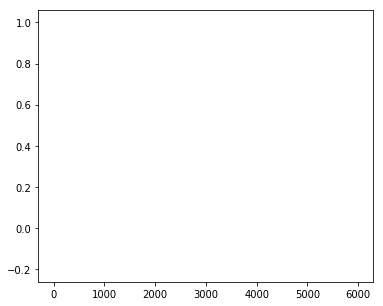

In [74]:
plt.figure(figsize = [6, 5])
plt.plot(xx, yy, "w")